#### This is a method to determine the number $\pi$ with Monte Carlo simulation: 

##### First, let's create a sketch of the problem to visualize our problem: 

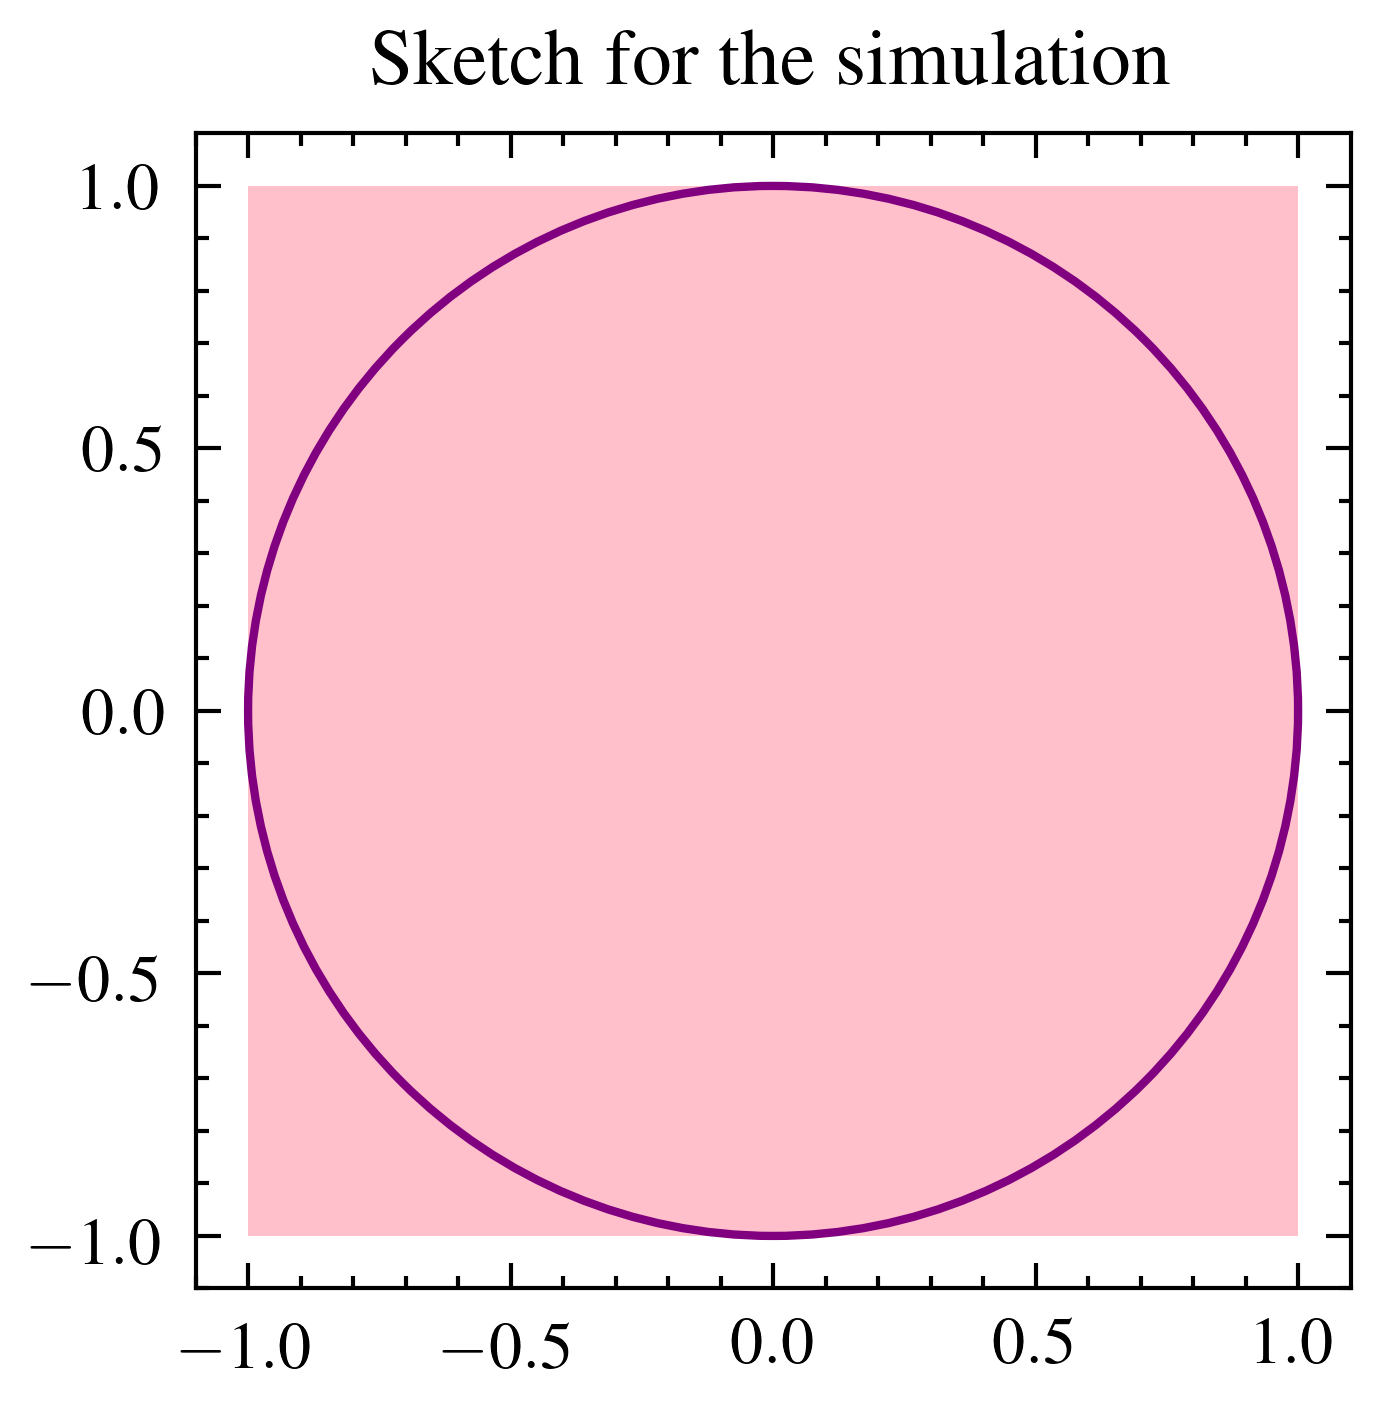

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib 
import scienceplots
plt.style.use(['science', 'ieee'])


# The purpose of this simulation is to determine the value of pi using the Monte Carlo simulation:
# Draw a circle inscribed in a square:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

# adding a square (side a = 2) : 
square = patches.Rectangle((-1, -1), 2, 2, facecolor='pink')
ax.add_patch(square)

# adding a circle of radius r = 1 : 
circle = patches.Circle((0, 0), 1, facecolor='none', edgecolor='purple')
ax.add_patch(circle)

# delimitations to see the square fully: 
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.title('Sketch for the simulation')
plt.show()

#### Let work with the mathematical formulas of the area of those two shapes in order to determine $\pi$ from the ratio of the areas : 

In [2]:
# generate random points and count how many point in and out, and ratio of areas 
import sympy
from sympy import symbols 

pi, r, a = symbols('pi r a')
circle_area = pi * r**2 
square_area = a**2 
ratio = circle_area/square_area
ratio

pi*r**2/a**2

In [3]:
# Verification: 
pi_number = ratio*a**2 / r**2
(pi_number)

pi

#### Let's generate a list of random coordinates and determine weather they stand in or out of the circle: 

In [11]:
%%timeit

# If we have r = 1, then pi = ratio * a^2
# If a = 2, then pi = 4 * ratio
points = 10000

# numbers from -1 to 1: (20)
rand = 2 * np.random.rand(2 * points) - 1

# generate pairs
randpoints = rand.reshape(points, 2)

# Check if the point is in the circle by looking at the distance from the origin (squared norm):
# randpoints[:,0]**2: square of the entire first column
# randpoints[:,1]**2: square of the entire second column
normpoints = randpoints[:, 0] ** 2 + randpoints[:, 1] ** 2
# print(normpoints)

# condition for a point outside of circle if norm is bigger than radius known of one 
condition_out = normpoints > 1
condition_in = normpoints <= 1

#randpoints[normpoints > 1]: utilise le tableau de valeurs booléennes comme masque pour 
#sélectionner uniquement les lignes de randpoints où la condition normpoints > 1 est vraie: 
points_out = randpoints[condition_out]

# On utilise la condition inverse pour récupérer les paires de coordonnées qui sont à l'intérieur du cercle: 
points_in = randpoints[condition_in]
pi_approx = 4 * len(points_in)/points
pi_approx

607 µs ± 15.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


#### Let's make an approximation for $\pi$ with the formula determined previously: 

$$ \pi_{approx} = 4 * ratio$$

We can see that that the more pair of points we take, the more accurate the approximation is : 

In [5]:
pi_approx = 4 * len(points_in)/points
pi_approx

3.1312

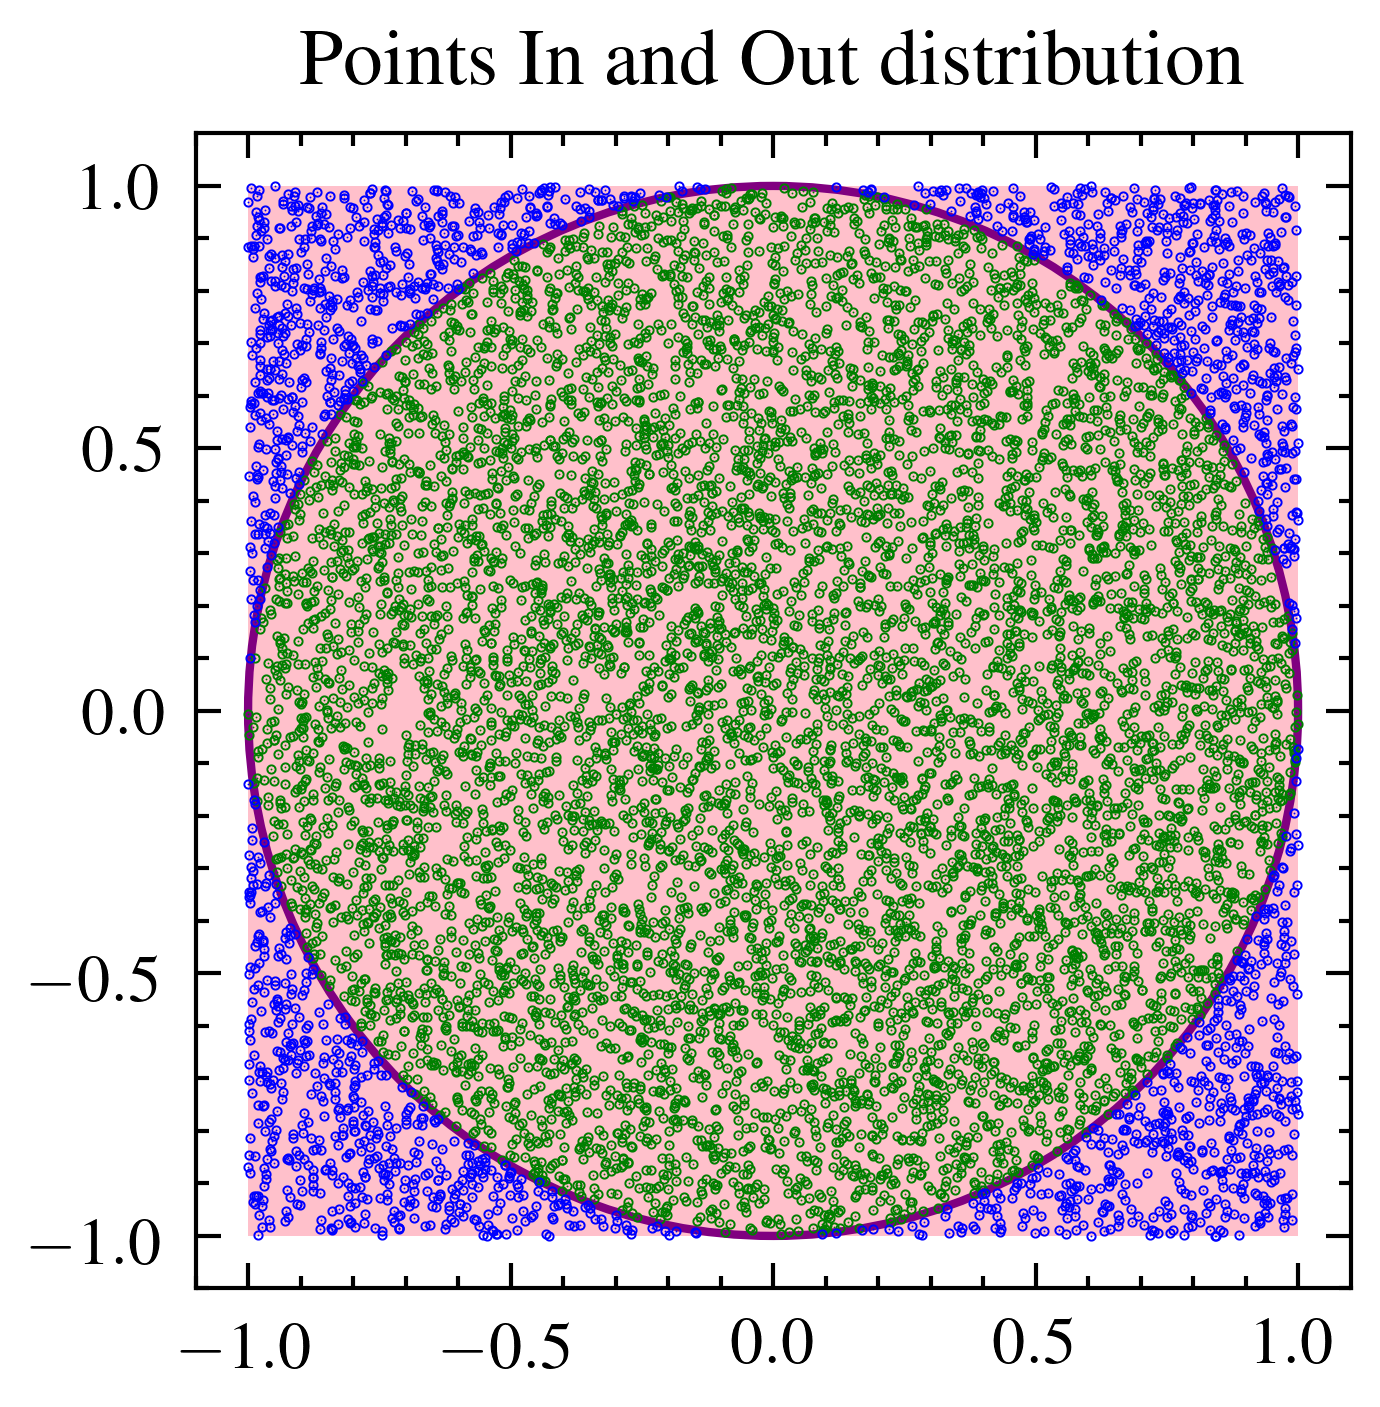

In [12]:
# The purpose of this simulation is to determine the value of pi using the Monte Carlo simulation:
# Draw a circle inscribed in a square:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

# adding a square (side a = 2) : 
square = patches.Rectangle((-1, -1), 2, 2, facecolor='pink')
ax.add_patch(square)

# adding a circle of radius r = 1 : 
circle = patches.Circle((0, 0), 1, facecolor='none', edgecolor='purple')
ax.add_patch(circle)

# delimitations to see the square fully: 
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.scatter(points_in[:,0],points_in[:,1], color= 'green',s = 0.05)
plt.scatter(points_out[:,0],points_out[:,1], color= 'blue',s = 0.05)
plt.title('Points In and Out distribution')
plt.show()

#### Another method for the approximation of $\pi$ (slower than array/list method)

In [26]:
%%timeit
i = 0 
counter = 0 

while i<points: 
    rand_num = 2*np.random.rand(2)-1
    if np.linalg.norm(rand_num) < 1:
        counter += 1 
    i += 1

pi_approx = 4 * counter / points

159 ms ± 6.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
print(pi_approx)

3.1352
